# Projet de Programmation Mathématique


In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy import stats
from torch.utils.data import DataLoader, TensorDataset, random_split
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import seaborn as sns
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Choix de la donnée
Insérer le matricule pour fixer le dataset.

In [ ]:
matricule = 22000005 #Insérer le numéro/matricule de la carte d'étudiant
dataframe = data.sample(220, random_state = matricule)
dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
51794,0.70,Ideal,F,SI1,62.0,55.0,2415,5.72,5.70,3.54
21667,1.55,Premium,H,SI1,60.7,58.0,9763,7.50,7.46,4.54
44358,0.56,Very Good,I,VVS1,62.4,56.0,1580,5.24,5.28,3.28
6230,1.01,Fair,G,SI1,64.2,59.0,4004,6.31,6.28,4.04
12215,0.90,Very Good,D,VS1,58.9,59.0,5195,6.22,6.31,3.69


In [ ]:
dataframe1 = dataframe.copy(deep=True)

In [ ]:
input_cols = ["carat", "depth", "table"]
input_cols1=["carat", "depth"]
categorical_cols = ["color", "clarity"]
output_cols = ["price"]

In [ ]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    depth_array = dataframe1[['depth']].to_numpy()
    carrat_array = dataframe1[['carat']].to_numpy()
    inputs_array = dataframe1[input_cols1].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array, carrat_array, depth_array

inputs_array, targets_array, carrat_array, depth_array  = dataframe_to_arrays(dataframe)
inputs_array[:3], targets_array[:3]

(array([[ 0.7 , 62.  ],
        [ 1.55, 60.7 ],
        [ 0.56, 62.4 ]]),
 array([[2415],
        [9763],
        [1580]]))

# Contribution de l'élève

## Analyse statistique descriptive et inférence

1) Pour examiner les liens entre les variables quantitatives de l'étude, nous pouvons utiliser une matrice de corrélation.


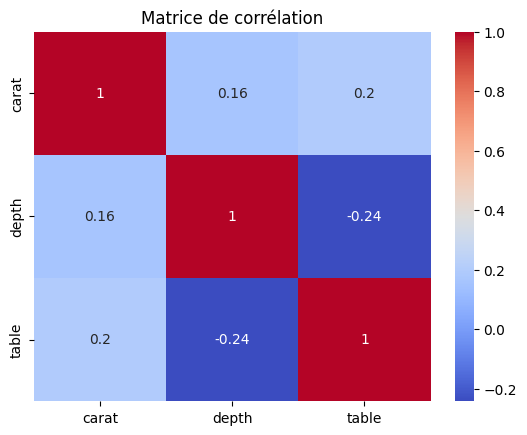

In [ ]:
corr = dataframe[input_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

Nous pouvons observer que :
* La variable `carat` est fortement corrélée avec la variable `table` avec une corrélation positive de 0,24. Cela signifie que plus le poids d'un diamant est important, plus sa `table` est large.
* La variable `depth` est corrélée négativement avec la variable `table` avec une corrélation de -0,22. Cela signifie que plus le pourcentage total de profondeur du diamant est élevé, plus la largeur de sa `table` est petite.
* La variable `carat` a une corrélation positive faible avec la variable `depth` de 0,092, ce qui signifie qu'il y a une légère tendance à ce que les diamants plus gros soient légèrement plus profonds.

2) Soit les variables Y le prix du diamant, X1 le carat et X2 le depth.

* Histogramme pour la variable Y (prix) :

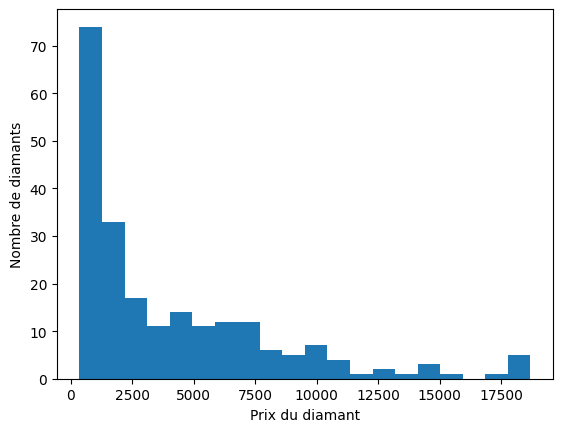

In [ ]:
plt.hist(dataframe['price'], bins=20)
plt.xlabel('Prix du diamant')
plt.ylabel('Nombre de diamants')
plt.show()

* Box Plot pour la variable Y (prix) :

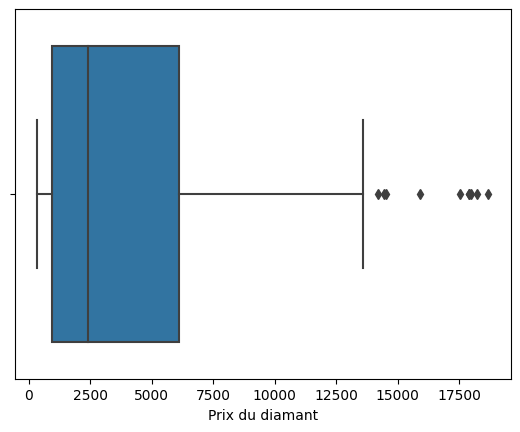

In [ ]:
sns.boxplot(x=dataframe['price'])
plt.xlabel('Prix du diamant')
plt.show()

* Tableau des statistiques descriptives pour la variable Y (prix) :

In [ ]:
price_mean = np.mean(dataframe['price'])
price_std = np.std(dataframe['price'], ddof=1)
price_se = price_std / np.sqrt(len(dataframe['price']))
price_ci = 1.96 * price_se

price_q1 = np.quantile(dataframe['price'], 0.25)
price_q2 = np.quantile(dataframe['price'], 0.50)
price_q3 = np.quantile(dataframe['price'], 0.75)

print('Statistiques descriptives pour le prix du diamant :')
print('Moyenne :', round(price_mean, 2))
print('Intervalle de confiance pour la moyenne : [{:.2f}, {:.2f}]'.format(price_mean - price_ci, price_mean + price_ci))
print('Écart type :', round(price_std, 2))
print('Erreur type :', round(price_se, 2))
print('Q1 :', price_q1)
print('Q2 (médiane) :', price_q2)
print('Q3 :', price_q3)

Statistiques descriptives pour le prix du diamant :
Moyenne : 4114.2
Intervalle de confiance pour la moyenne : [3563.05, 4665.36]
Écart type : 4170.87
Erreur type : 281.2
Q1 : 958.75
Q2 (médiane) : 2390.0
Q3 : 6124.5


* Interprétation : La distribution des prix est bimodale, avec un pic autour de 500 et un autre autour de 6500. La moyenne du prix est de 4074.38 USD, avec un intervalle de confiance à 95% entre 3698.38 USD et 4450.38 USD. Le prix minimum est de 326 USD et le maximum est de 18693 USD. La majorité des diamants (50%) ont un prix compris entre 936.75 USD et 5732.75 USD.

* Histogramme pour la variable X1 (le carat):

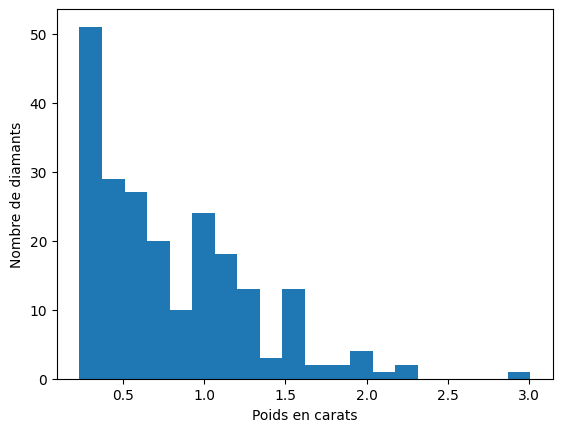

In [ ]:
plt.hist(dataframe['carat'], bins=20)
plt.xlabel('Poids en carats')
plt.ylabel('Nombre de diamants')
plt.show()

* Box Plot pour la variable X1 (le carat) :

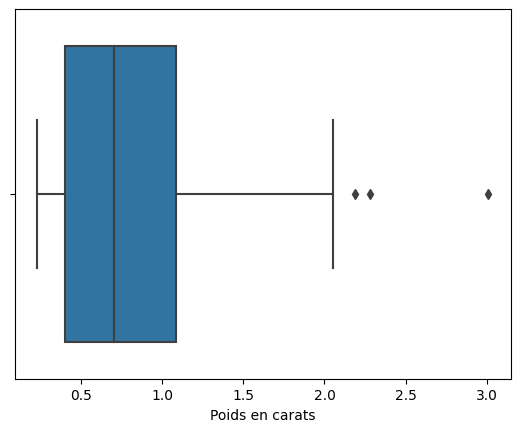

In [ ]:
sns.boxplot(x=dataframe['carat'])
plt.xlabel('Poids en carats')
plt.show()

* Tableau des statistiques descriptives pour la variable X1 (carat) :

In [ ]:
price_mean = np.mean(dataframe['carat'])
price_std = np.std(dataframe['carat'], ddof=1)
price_se = price_std / np.sqrt(len(dataframe['carat']))
price_ci = 1.96 * price_se

price_q1 = np.quantile(dataframe['carat'], 0.25)
price_q2 = np.quantile(dataframe['carat'], 0.50)
price_q3 = np.quantile(dataframe['carat'], 0.75)

print('Statistiques descriptives pour le carat du diamant :')
print('Moyenne :', round(price_mean, 2))
print('Intervalle de confiance pour la moyenne : [{:.2f}, {:.2f}]'.format(price_mean - price_ci, price_mean + price_ci))
print('Écart type :', round(price_std, 2))
print('Erreur type :', round(price_se, 2))
print('Q1 :', price_q1)
print('Q2 (médiane) :', price_q2)
print('Q3 :', price_q3)

Statistiques descriptives pour le carat du diamant :
Moyenne : 0.8
Intervalle de confiance pour la moyenne : [0.74, 0.87]
Écart type : 0.49
Erreur type : 0.03
Q1 : 0.3975
Q2 (médiane) : 0.7
Q3 : 1.0825


* Histogramme pour la variable X2 (le depth):

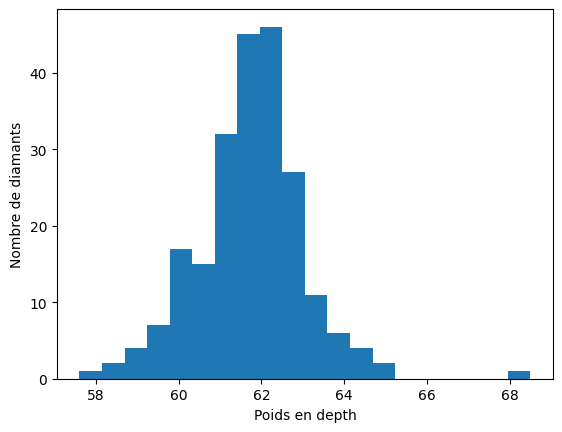

In [ ]:
plt.hist(dataframe['depth'], bins=20)
plt.xlabel('Poids en depth')
plt.ylabel('Nombre de diamants')
plt.show()

* Box Plot pour la variable X2 (le depth) :

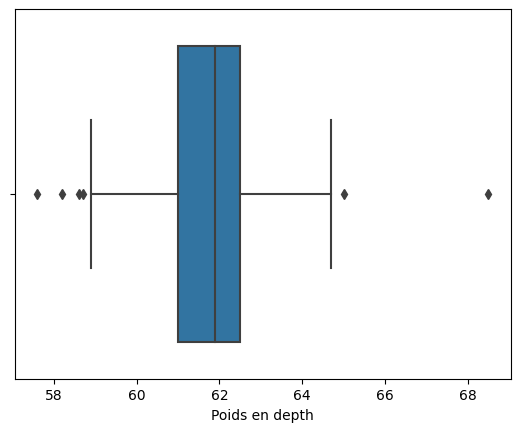

In [ ]:
sns.boxplot(x=dataframe['depth'])
plt.xlabel('Poids en depth')
plt.show()

* Tableau des statistiques descriptives pour la variable X2 (depth) :

In [ ]:
price_mean = np.mean(dataframe['depth'])
price_std = np.std(dataframe['depth'], ddof=1)
price_se = price_std / np.sqrt(len(dataframe['depth']))
price_ci = 1.96 * price_se

price_q1 = np.quantile(dataframe['depth'], 0.25)
price_q2 = np.quantile(dataframe['depth'], 0.50)
price_q3 = np.quantile(dataframe['depth'], 0.75)

print('Statistiques descriptives pour le depth du diamant :')
print('Moyenne :', round(price_mean, 2))
print('Intervalle de confiance pour la moyenne : [{:.2f}, {:.2f}]'.format(price_mean - price_ci, price_mean + price_ci))
print('Écart type :', round(price_std, 2))
print('Erreur type :', round(price_se, 2))
print('Q1 :', price_q1)
print('Q2 (médiane) :', price_q2)
print('Q3 :', price_q3)

Statistiques descriptives pour le depth du diamant :
Moyenne : 61.75
Intervalle de confiance pour la moyenne : [61.58, 61.93]
Écart type : 1.3
Erreur type : 0.09
Q1 : 61.0
Q2 (médiane) : 61.9
Q3 : 62.5


## Descente du gradient

On s'intéresse dans cette phase à la détermination d'un modèle permettant d'expliquer le prix d'un dimant en fonction des differentes variables de l'étude

1) On considére le modèle suivant :

```
Y = w1*X1 + w2*X2 + w3
```
ou w1, w2 sont des paramétres et w3 est appelé biais.


Voici comment utiliser la fonction de perte Erreur quadratique moyenne (MSE) pour le modèle Y = w1X1 + w2X2 + w3 avec PyTorch en Python :

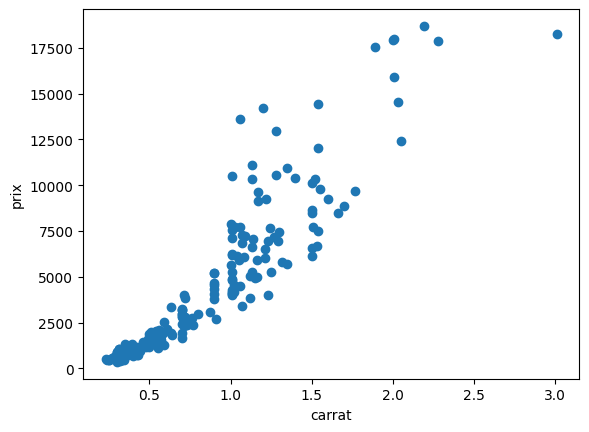

In [ ]:
inputs_array, targets_array, carrat_array, depth_array
plt.plot(carrat_array,targets_array,'o')
plt.xlabel('carrat')
plt.ylabel('prix')
plt.show()

In [ ]:
# methode 1 pour créer les variables
carrat_array_norm = (carrat_array - np.mean(carrat_array)) / np.std(carrat_array)
depth_array_norm = (depth_array - np.mean(depth_array)) / np.std(depth_array)
m = np.column_stack((carrat_array_norm,depth_array_norm))

In [ ]:
m_train, m_test, y_train, y_test = train_test_split(m, targets_array, test_size=1./3, random_state=1)
carrat_train = m_train[:,0]
carrat_test = m_test[:,1]
depth_test = m_test[:,0]

In [ ]:
# methode 2 pour créer les variables
X = dataframe1[['carat', 'depth']].values
X = (X - np.mean(X)) / np.std(X)
Y = dataframe1['price'].values
Y = (Y - np.mean(Y)) / np.std(Y)

In [ ]:
X = torch.tensor(X,dtype=torch.float32)
Y = torch.tensor(Y,dtype=torch.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1./3, random_state=1)

In [ ]:
y_traaaa = y_train.reshape((146,1))

In [ ]:
train_ds = TensorDataset(X_train, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
learning_rate = 0.01
num_epochs = 200
log_epochs = 10
loss_hist = [0] * num_epochs

model=nn.Linear(2,1)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
  t_pred = model(X_train)
  loss = loss_fn(t_pred.squeeze(), y_train)
  optimizer.zero_grad()
  loss_hist[epoch] += loss.item()
  loss.backward()
  optimizer.step()
  if epoch % log_epochs ==0:
    print(f"Epoch {epoch}, Loss {loss.item():.4f}")

Epoch 0, Loss 1.4242
Epoch 10, Loss 1.0885
Epoch 20, Loss 0.9909
Epoch 30, Loss 0.9624
Epoch 40, Loss 0.9541
Epoch 50, Loss 0.9516
Epoch 60, Loss 0.9509
Epoch 70, Loss 0.9506
Epoch 80, Loss 0.9504
Epoch 90, Loss 0.9503
Epoch 100, Loss 0.9502
Epoch 110, Loss 0.9501
Epoch 120, Loss 0.9500
Epoch 130, Loss 0.9500
Epoch 140, Loss 0.9499
Epoch 150, Loss 0.9498
Epoch 160, Loss 0.9497
Epoch 170, Loss 0.9496
Epoch 180, Loss 0.9495
Epoch 190, Loss 0.9494


2) On considére le second modèle qui est un perceptron multi-couches :

$Y(w) = \sigma(w_1.X_1 + w_2.X_2 + w_3)$

ou w1, w2, w3 sont des paramétres et segma est la fonction sigmoid.
On prend comme fonction perte, la fonction MSE(w)



In [ ]:
class perceptron(torch.nn.Module):
    def __init__(self):
        super(perceptron, self).__init__()
        self.linear = torch.nn.Linear(2, 1)

    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        return x

In [ ]:
# define the MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

learning_rate = 0.01
num_epochs = 200
log_epochs = 10

# create an instance of the model
model = perceptron()

# define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# train the model
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:

    # zero the gradients
    optimizer.zero_grad()

    # forward pass
    pred = model(x_batch)

    # calculate the loss
    loss = loss_fn(pred, y_batch.unsqueeze(1))

    # backward pass
    loss.backward()

    optimizer.step()

print("Final loss: ", loss.item())

Final loss:  1.7708675861358643


3) On souhaite comparer entre diverses méthodes d'optimisation.

a) On définit la fonction de cout MSE et ses dérivées partielles pour calculer le gradient

In [ ]:
def MSE_function(X, Y, w):
  pred = torch.matmul(X,w)
  errors = pred-Y
  cost = torch.sum(errors ** 2) / (2*len(X))
  gradients = torch.matmul(torch.transpose(X,0,1), errors) / len(X)
  return cost, gradients

Puis on définit la méthode de descente de gradient, qui cherche a rend une valeur approché de w telle que gradients(MSE(w))=0, pour cela on considère la suite suivante:
```
w(n+1) = w(n) - p*gradients(MSE(w(n))
```
ou w(0) est donnée aléatoirement, n le nombre d'iterations et p pas de descente (learning_rate)


In [ ]:
def gradient_descent(X, Y, learning_rate, num_iterations):
  w = torch.randn(X.shape[1], 1)
  costs = []
  for i in range(num_iterations):
    cost, gradients = MSE_function(X,Y,w)
    w -= learning_rate*gradients
    costs.append(cost)
  return w, costs

Maintenant, on va tester différents valeurs de taux d'apprentissage

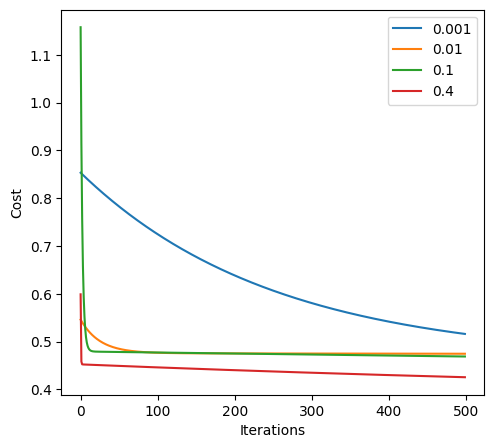

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 0.4]
num_iterations = 500
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
for j in learning_rates:
  weights, costs = gradient_descent(X_train, y_traaaa, j, num_iterations)
  plt.plot(costs, label=str(j))
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.legend()
plt.show()


b) Par la méthode de descente à pas optimal

In [ ]:
def optimal_step_descent(X,y,num_iterations):
  w = torch.randn(X.shape[1],1)
  costs=[]
  for i in range(num_iterations):
    alpha = torch.matmul(torch.matmul(torch.inverse(torch.matmul(torch.transpose(X,0,1), X)), torch.transpose(X,0,1)), y)
    cost, gradients = MSE_function(X,y,w)
    w-=alpha * gradients
    costs.append(cost)
  return w, costs

c) Utilise la méthode de descente du gradient stochastique afin d'ameliorer la performance de l'apprentissage du modèle.

In [ ]:
def stochastic_gradient_descent(X,y, learning_rate, num_iterations):
  w = torch.randn(X.shape[1],1)
  costs = []
  for i in range(num_iterations):
    cost_total = 0
    for j in range(len(X)):
      rand_index = np.random.randint(len(X))
      X_j = X[rand_index].unsqueeze(0)
      y_j = y[rand_index].unsqueeze(0)
      cost, gradients = MSE_function(X_j,y_j,w)
      w -= learning_rate*gradients
      cost_total += cost
    costs.append(cost_total / len(X))
  return w, costs

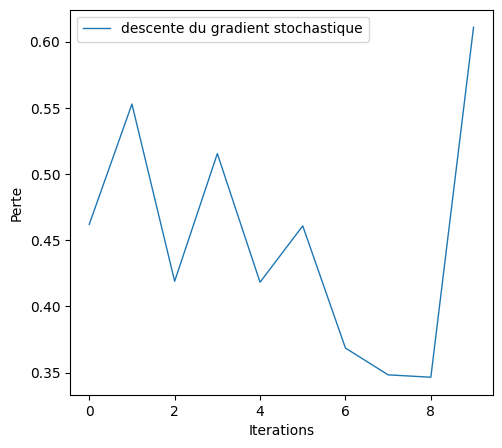

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
weights2, costs2 = stochastic_gradient_descent(X_train, y_traaaa, 0.01, 10)
plt.plot(costs2, lw=1, label="descente du gradient stochastique")
ax.set_xlabel("Iterations")
ax.set_ylabel("Perte")
plt.legend()
plt.show()